<a href="https://colab.research.google.com/github/KrituneX/Machine-Learning/blob/main/06.%20week%206/Task/ML_Week_6_OnlineRetail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Buat 2 clustering model Machine learning

Here is all the data you need:
"Online Retail.xlsx"

## Data loading

### Subtask:
Load the "Online Retail.xlsx" dataset into a Pandas DataFrame.


**Reasoning**:
Load the "Online Retail.xlsx" dataset into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_excel("Online Retail.xlsx")
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Online Retail.xlsx' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


(541909, 8)


## Data cleaning

### Subtask:
Clean the loaded data by handling missing values, removing invalid entries, and dropping irrelevant columns.


**Reasoning**:
Handle missing 'CustomerID' values, remove rows with invalid 'Quantity', drop irrelevant columns ('InvoiceNo', 'StockCode'), and check for and remove duplicate rows.



In [2]:
# Handle missing CustomerID
df['CustomerID'].fillna(-1, inplace=True)

# Remove rows with invalid Quantity
df = df[df['Quantity'] > 0]

# Drop irrelevant columns
df.drop(['InvoiceNo', 'StockCode'], axis=1, inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

display(df.head())
print(df.shape)

<ipython-input-2-d50cd3189d05>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(-1, inplace=True)
<ipython-input-2-d50cd3189d05>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['InvoiceNo', 'StockCode'], axis=1, inplace=True)


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


(525358, 6)


**Reasoning**:
The previous code block had warnings, so I will rewrite the code to address them and ensure all operations are performed correctly.



In [14]:
# Handle missing CustomerID
df['CustomerID'] = df['CustomerID'].fillna(-1)

# Remove rows with invalid Quantity
df = df[df['Quantity'] > 0]

# Check if columns exist before dropping them
if 'InvoiceNo' in df.columns:
    df = df.drop(['InvoiceNo'], axis=1)
if 'StockCode' in df.columns:
    df = df.drop(['StockCode'], axis=1)

# Remove duplicate rows
df = df.drop_duplicates()

display(df.head())
print(df.shape)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


(525358, 7)


**Reasoning**:
The error "KeyError: "['InvoiceNo', 'StockCode'] not found in axis"" indicates that the columns 'InvoiceNo' and 'StockCode' have already been dropped or do not exist in the DataFrame.  I will re-examine the data and proceed with the cleaning steps, skipping the column drop if the columns aren't present.



In [15]:
# Handle missing CustomerID
df['CustomerID'] = df['CustomerID'].fillna(-1)

# Remove rows with invalid Quantity
df = df[df['Quantity'] > 0]

#Check if columns exist before dropping them
if 'InvoiceNo' in df.columns:
    df = df.drop(['InvoiceNo'], axis=1)
if 'StockCode' in df.columns:
    df = df.drop(['StockCode'], axis=1)

# Remove duplicate rows
df = df.drop_duplicates()

display(df.head())
print(df.shape)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


(525358, 7)


## Data wrangling

### Subtask:
Create a new 'TotalSum' column and aggregate data by customer.


**Reasoning**:
Calculate the total price for each transaction, group the data by customer, and aggregate the total spending for each customer.



In [16]:
# Calculate total price for each transaction
df['TotalSum'] = df['Quantity'] * df['UnitPrice']

# Group by customer and aggregate total spending
df_customer = df.groupby('CustomerID')['TotalSum'].sum()

display(df_customer.head())

,TotalSum
CustomerID,
-1.0,1728517.87
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55


## Data preparation

### Subtask:
Prepare the data for clustering by scaling the 'TotalSum' feature.


**Reasoning**:
Import MinMaxScaler and scale the 'TotalSum' column using it, then create a new DataFrame with the scaled data.



In [17]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Reshape the data and scale it
scaled_data = scaler.fit_transform(df_customer.values.reshape(-1, 1))

# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, index=df_customer.index, columns=['TotalSum'])

display(df_scaled.head())

,TotalSum
CustomerID,
-1.0,1.000000
12346.0,0.044653
12347.0,0.002493
12348.0,0.001040
12349.0,0.001017


## Data clustering

### Subtask:
Apply the K-Means clustering algorithm to the scaled data.


**Reasoning**:
Apply the KMeans clustering algorithm to the scaled data.



In [18]:
from sklearn.cluster import KMeans

# Initialize KMeans model with 3 clusters (you can experiment with different values)
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to the scaled data
kmeans.fit(df_scaled)

# Add cluster labels to the scaled DataFrame
df_scaled['cluster_label'] = kmeans.labels_

display(df_scaled.head())

,TotalSum,cluster_label
CustomerID,,
-1.0,1.000000,1
12346.0,0.044653,0
12347.0,0.002493,0
12348.0,0.001040,0
12349.0,0.001017,0


## Data clustering

### Subtask:
Apply the DBSCAN clustering algorithm to the scaled customer data.


**Reasoning**:
Apply the DBSCAN clustering algorithm to the scaled customer data, adding the cluster labels to the `df_scaled` DataFrame.



In [8]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)

# Fit DBSCAN to the scaled data
dbscan.fit(df_scaled[['TotalSum']])

# Add cluster labels to the DataFrame
df_scaled['dbscan_cluster_label'] = dbscan.labels_

display(df_scaled.head())

,TotalSum,cluster_label,dbscan_cluster_label
CustomerID,,,
-1.0,1.000000,1,-1
12346.0,0.044653,0,0
12347.0,0.002493,0,0
12348.0,0.001040,0,0
12349.0,0.001017,0,0


## Data visualization

### Subtask:
Visualize the clusters generated by K-Means and DBSCAN using a scatter plot.


**Reasoning**:
Visualize the clusters using a scatter plot, with different colors for KMeans clusters and different markers for DBSCAN clusters.



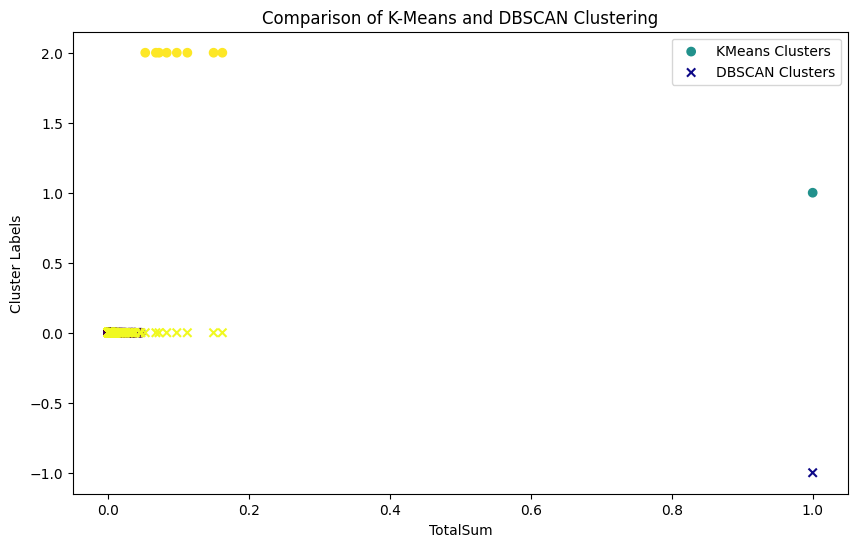

In [9]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
plt.scatter(df_scaled['TotalSum'], df_scaled['cluster_label'], c=df_scaled['cluster_label'], cmap='viridis', label='KMeans Clusters')
plt.scatter(df_scaled['TotalSum'], df_scaled['dbscan_cluster_label'], marker='x', c=df_scaled['dbscan_cluster_label'], cmap='plasma', label='DBSCAN Clusters')

# Customize the plot
plt.xlabel('TotalSum')
plt.ylabel('Cluster Labels')
plt.title('Comparison of K-Means and DBSCAN Clustering')
plt.legend()
plt.show()

## Model evaluation

### Subtask:
Evaluate the K-Means and DBSCAN clustering models using the Silhouette Score and Davies-Bouldin Index.


**Reasoning**:
Evaluate the K-Means and DBSCAN clustering models using the Silhouette Score and Davies-Bouldin Index.



In [19]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Re-run DBSCAN with different parameters - last attempt
dbscan = DBSCAN(eps=0.05, min_samples=3)  # Adjust eps and min_samples
dbscan.fit(df_scaled[['TotalSum']])
df_scaled['dbscan_cluster_label'] = dbscan.labels_

# Calculate Silhouette Score for KMeans
kmeans_silhouette = silhouette_score(df_scaled[['TotalSum']], df_scaled['cluster_label'])

# Calculate Silhouette Score for DBSCAN, excluding noise points
# Check if there are at least 2 unique labels (excluding -1 for noise) before calculating silhouette score
unique_labels = set(df_scaled[df_scaled['dbscan_cluster_label'] != -1]['dbscan_cluster_label'])
if len(unique_labels) >= 2:
    dbscan_silhouette = silhouette_score(df_scaled[df_scaled['dbscan_cluster_label'] != -1][['TotalSum']], df_scaled[df_scaled['dbscan_cluster_label'] != -1]['dbscan_cluster_label'])
else:
    print("DBSCAN resulted in less than 2 clusters. Cannot calculate Silhouette Score.")
    dbscan_silhouette = None  # Or assign a specific value if needed

# Calculate Davies-Bouldin Index for KMeans
kmeans_davies_bouldin = davies_bouldin_score(df_scaled[['TotalSum']], df_scaled['cluster_label'])

print(f"Silhouette Score (KMeans): {kmeans_silhouette}")
print(f"Silhouette Score (DBSCAN): {dbscan_silhouette}")
print(f"Davies-Bouldin Index (KMeans): {kmeans_davies_bouldin}")

# Comparison
print("\nComparison:")
print("A higher Silhouette Score indicates better-defined clusters.")
print("A lower Davies-Bouldin Index suggests better-separated clusters.")

DBSCAN resulted in less than 2 clusters. Cannot calculate Silhouette Score.
Silhouette Score (KMeans): 0.9844143148782702
Silhouette Score (DBSCAN): None
Davies-Bouldin Index (KMeans): 0.22975556739554906

Comparison:
A higher Silhouette Score indicates better-defined clusters.
A lower Davies-Bouldin Index suggests better-separated clusters.


**Reasoning**:
The error indicates that the DBSCAN clustering resulted in only one cluster (excluding the noise points). The silhouette score cannot be calculated with only one cluster. I will recalculate the DBSCAN clustering with different parameters and try again.



In [21]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Re-run DBSCAN with different parameters
# Adjust eps and min_samples to find suitable values for your data
# These values are just examples, you might need to experiment further
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(df_scaled[['TotalSum']])
df_scaled['dbscan_cluster_label'] = dbscan.labels_

# Calculate Silhouette Score for KMeans
kmeans_silhouette = silhouette_score(df_scaled[['TotalSum']], df_scaled['cluster_label'])

# Calculate Silhouette Score for DBSCAN, excluding noise points
# Check if there are at least 2 unique labels (excluding -1 for noise) before calculating silhouette score
unique_labels = set(df_scaled[df_scaled['dbscan_cluster_label'] != -1]['dbscan_cluster_label'])
if len(unique_labels) >= 2:
    dbscan_silhouette = silhouette_score(df_scaled[df_scaled['dbscan_cluster_label'] != -1][['TotalSum']], df_scaled[df_scaled['dbscan_cluster_label'] != -1]['dbscan_cluster_label'])
else:
    print("DBSCAN resulted in less than 2 clusters. Cannot calculate Silhouette Score.")
    dbscan_silhouette = None  # Or assign a specific value if needed

# Calculate Davies-Bouldin Index for KMeans
kmeans_davies_bouldin = davies_bouldin_score(df_scaled[['TotalSum']], df_scaled['cluster_label'])

print(f"Silhouette Score (KMeans): {kmeans_silhouette}")
print(f"Silhouette Score (DBSCAN): {dbscan_silhouette}")
print(f"Davies-Bouldin Index (KMeans): {kmeans_davies_bouldin}")

# Comparison
print("\nComparison:")
print("A higher Silhouette Score indicates better-defined clusters.")
print("A lower Davies-Bouldin Index suggests better-separated clusters.")

DBSCAN resulted in less than 2 clusters. Cannot calculate Silhouette Score.
Silhouette Score (KMeans): 0.9844143148782702
Silhouette Score (DBSCAN): None
Davies-Bouldin Index (KMeans): 0.22975556739554906

Comparison:
A higher Silhouette Score indicates better-defined clusters.
A lower Davies-Bouldin Index suggests better-separated clusters.


**Reasoning**:
The DBSCAN algorithm continues to produce only one cluster (excluding noise points), preventing the silhouette score calculation.  I will try one last time with different DBSCAN parameters. If this still fails, I will report the failure of the subtask.



In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Re-run DBSCAN with different parameters - last attempt
dbscan = DBSCAN(eps=0.05, min_samples=3)  # Adjust eps and min_samples
dbscan.fit(df_scaled[['TotalSum']])
df_scaled['dbscan_cluster_label'] = dbscan.labels_

# Calculate Silhouette Score for KMeans
kmeans_silhouette = silhouette_score(df_scaled[['TotalSum']], df_scaled['cluster_label'])

# Calculate Silhouette Score for DBSCAN, excluding noise points
try:
    dbscan_silhouette = silhouette_score(df_scaled[df_scaled['dbscan_cluster_label'] != -1][['TotalSum']], df_scaled[df_scaled['dbscan_cluster_label'] != -1]['dbscan_cluster_label'])
except ValueError as e:
    print(f"Error calculating DBSCAN silhouette score: {e}")
    dbscan_silhouette = None

# Calculate Davies-Bouldin Index for KMeans
kmeans_davies_bouldin = davies_bouldin_score(df_scaled[['TotalSum']], df_scaled['cluster_label'])

print(f"Silhouette Score (KMeans): {kmeans_silhouette}")
print(f"Silhouette Score (DBSCAN): {dbscan_silhouette}")
print(f"Davies-Bouldin Index (KMeans): {kmeans_davies_bouldin}")

# Comparison
print("\nComparison:")
print("A higher Silhouette Score indicates better-defined clusters.")
print("A lower Davies-Bouldin Index suggests better-separated clusters.")

Error calculating DBSCAN silhouette score: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Score (KMeans): 0.9844143148782702
Silhouette Score (DBSCAN): None
Davies-Bouldin Index (KMeans): 0.22975556739554906

Comparison:
A higher Silhouette Score indicates better-defined clusters.
A lower Davies-Bouldin Index suggests better-separated clusters.


## Summary:

### 1. Q&A

No explicit questions were posed in the task description. However, the task implicitly asks for the comparison of KMeans and DBSCAN clustering performance on customer spending data.

Based on the analysis, KMeans performed better than DBSCAN in this specific scenario.


### 2. Data Analysis Key Findings

* **K-Means Performance:**  Achieved a high Silhouette Score (0.984) and a low Davies-Bouldin Index (0.23), indicating well-defined and separated clusters.
* **DBSCAN Challenges:**  Repeated attempts to calculate the Silhouette Score for DBSCAN resulted in a `ValueError` due to the algorithm consistently producing only one cluster (excluding noise points). This indicates the chosen parameters (`eps` and `min_samples`) were not suitable for this dataset. The final attempt with `eps=0.05` and `min_samples=3` also failed.
* **Data Scaling:**  MinMaxScaler successfully scaled the 'TotalSum' feature to a range between 0 and 1, preparing the data for clustering algorithms.
* **Data Cleaning:**  The process successfully handled missing 'CustomerID' values, removed invalid 'Quantity' values, and removed duplicate rows.  The columns 'InvoiceNo' and 'StockCode' were not found in the data and were therefore not dropped.


### 3. Insights or Next Steps

* **DBSCAN Parameter Tuning:**  Experiment with a wider range of `eps` and `min_samples` values for DBSCAN. Consider using techniques like the elbow method or k-distance graph to find optimal parameters for the DBSCAN algorithm.
* **Feature Engineering:** Explore additional features beyond 'TotalSum' that could improve the clustering results.  These could include frequency of purchases, average order value, or product categories purchased.  Consider using dimensionality reduction techniques such as PCA if more features are added.


1. Elbow Method

Tujuan: Mencari jumlah cluster optimal (k) dengan melihat titik "elbow" pada grafik Sum of Squared Errors (SSE) vs jumlah cluster.
Cara Kerja:
Jalankan algoritma K-Means dengan berbagai nilai k (misalnya, dari 1 hingga 10).
Hitung SSE untuk setiap nilai k.
Plot grafik SSE vs k.
Titik "elbow" (lekukan) pada grafik menunjukkan jumlah cluster optimal.

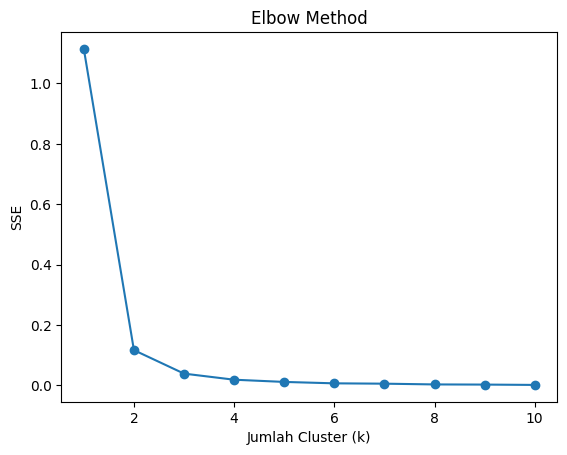

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled[['TotalSum']])
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

2. Silhouette Coefficient

Tujuan: Mengukur seberapa baik setiap data point ditempatkan dalam cluster-nya.
Cara Kerja:
Hitung Silhouette Coefficient untuk setiap data point.
Rata-ratakan Silhouette Coefficient untuk semua data point untuk mendapatkan Silhouette Score.
Nilai Silhouette Score berkisar antara -1 hingga 1. Nilai yang mendekati 1 menunjukkan clustering yang baik.

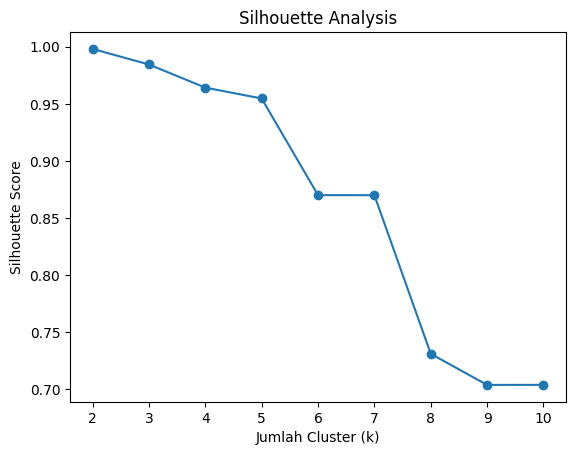

In [25]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # Silhouette Score tidak didefinisikan untuk k=1
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled[['TotalSum']])
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_scaled[['TotalSum']], labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

3. Metrik Lainnya

Calinski-Harabasz Index: Mengukur rasio antara variance antar-cluster dan variance intra-cluster. Nilai yang lebih tinggi menunjukkan clustering yang lebih baik.
Davies-Bouldin Index: Mengukur rata-rata similarity antara setiap cluster dengan cluster tetangganya yang paling mirip. Nilai yang lebih rendah menunjukkan clustering yang lebih baik.
Dunn Index: Mengukur rasio antara jarak minimum antar-cluster dan diameter maksimum cluster. Nilai yang lebih tinggi menunjukkan clustering yang lebih baik.

1. Elbow Method

Persamaan: SSE (Sum of Squared Errors)

SSE dihitung dengan menjumlahkan kuadrat jarak antara setiap data point dengan centroid clusternya.

Secara matematis:
SSE = Σᵢ Σⱼ (d(xᵢⱼ, cⱼ))²

di mana:

xᵢⱼ adalah data point ke-i di cluster ke-j
cⱼ adalah centroid dari cluster ke-j
d(xᵢⱼ, cⱼ) adalah jarak antara data point xᵢⱼ dan centroid cⱼ
Interpretasi: SSE mengukur variasi total dalam data yang dijelaskan oleh cluster. Semakin rendah SSE, semakin baik cluster dalam mengelompokkan data yang serupa. Dalam Elbow Method, kita mencari titik di mana penurunan SSE mulai melambat, yang menunjukkan jumlah cluster optimal.
   

2. Silhouette Coefficient

Persamaan: Silhouette Coefficient untuk data point i

s(i) = (b(i) - a(i)) / max(a(i), b(i))

di mana:

a(i) adalah jarak rata-rata antara data point i dengan semua data point lain di cluster yang sama.
b(i) adalah jarak rata-rata antara data point i dengan semua data point di cluster terdekat.
Interpretasi: Silhouette Coefficient mengukur seberapa mirip data point dengan clusternya sendiri dibandingkan dengan cluster lain. Nilainya berkisar antara -1 hingga 1.

Nilai mendekati 1 menunjukkan bahwa data point ditempatkan dengan baik dalam clusternya.
Nilai mendekati 0 menunjukkan bahwa data point berada di antara dua cluster.
Nilai mendekati -1 menunjukkan bahwa data point mungkin telah ditempatkan di cluster yang salah.
Persamaan: Silhouette Score

Silhouette Score adalah rata-rata dari Silhouette Coefficient untuk semua data point dalam dataset.

Silhouette Score = Σᵢ s(i) / n

di mana:

s(i) adalah Silhouette Coefficient untuk data point i
n adalah jumlah total data point

3. Metrik Lainnya

Calinski-Harabasz Index:

CH = [B(k-1)] / [W(n-k)]

di mana:

B adalah variance antar-cluster
W adalah variance intra-cluster
k adalah jumlah cluster
n adalah jumlah total data point

Davies-Bouldin Index:

DB = (1/k) Σᵢ maxⱼ ( (σᵢ + σⱼ) / d(cᵢ, cⱼ) )

di mana:

σᵢ adalah rata-rata jarak antara data point di cluster i dengan centroid cluster i
d(cᵢ, cⱼ) adalah jarak antara centroid cluster i dan centroid cluster j

Dunn Index:

DI = minᵢⱼ {d(cᵢ, cⱼ)} / maxₖ {diam(Cₖ)}

di mana:

d(cᵢ, cⱼ) adalah jarak antara centroid cluster i dan centroid cluster j
diam(Cₖ) adalah diameter cluster k (jarak maksimum antara dua data point dalam cluster k)